In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-image-classification/sample_submission.csv
/kaggle/input/sports-image-classification/train.csv
/kaggle/input/sports-image-classification/test.csv
/kaggle/input/sports-image-classification/test/730a467265.jpg
/kaggle/input/sports-image-classification/test/12a9b208fe.jpg
/kaggle/input/sports-image-classification/test/5e2050af87.jpg
/kaggle/input/sports-image-classification/test/1deb80beb0.jpg
/kaggle/input/sports-image-classification/test/72d05ce1b9.jpg
/kaggle/input/sports-image-classification/test/976e8009cd.jpg
/kaggle/input/sports-image-classification/test/04b282ddb5.jpg
/kaggle/input/sports-image-classification/test/b07060a4b2.jpg
/kaggle/input/sports-image-classification/test/63452153e7.jpg
/kaggle/input/sports-image-classification/test/90fe17fb0a.jpg
/kaggle/input/sports-image-classification/test/0f5be6481a.jpg
/kaggle/input/sports-image-classification/test/b67.jpg
/kaggle/input/sports-image-classification/test/40bb94ada3.jpg
/kaggle/input/sports-image-classif

In [2]:
import pandas as pd
import numpy as np

# handle os specific
import os

# randomization
import random

# visualization imports 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 17,7
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['axes.titlesize'] = 16
 
# ignore deprecated and future warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
# check the root dir
os.listdir('/kaggle/input')

['sports-image-classification']

In [4]:
# set the path
ROOT_DIR = '/kaggle/input'
FILE_PATH = os.path.join(ROOT_DIR,'sports-image-classification')

In [5]:
# LIST DIRCTORIES INSIDE THE FILE PATH
os.listdir(FILE_PATH)

['sample_submission.csv', 'train.csv', 'test.csv', 'test', 'train']

In [6]:
# SET THE TRAINING AND THE TEST PATH
TRAIN_IMAGES = os.path.join(FILE_PATH,'train')
TEST_IMAGES = os.path.join(FILE_PATH,'test')

In [7]:
len(os.listdir(TRAIN_IMAGES))

8227

In [8]:
len(os.listdir(TEST_IMAGES))

2056

In [9]:
# READ THE TRAIN csv FILE CONTAINING THE SPORTS LABEL
train_df = pd.read_csv(os.path.join(FILE_PATH,'train.csv'))
train_df.head(10)

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket
5,e06a27208d.jpg,Tennis
6,44771fadd2.jpg,Badminton
7,da4d3e218c.jpg,Swimming
8,b956f3bba8.jpg,Badminton
9,d02a1baab5.jpg,Badminton


In [10]:
test_df = pd.read_csv(os.path.join(FILE_PATH,'test.csv'))
test_df.tail()

,image_ID
2051,7be6c552a7.jpg
2052,4c9427f2a5.jpg
2053,0f429ae0d4.jpg
2054,a6557bedd9.jpg
2055,76266fd445.jpg


In [11]:
len(train_df['label'].unique())

7

In [12]:
# Extract the unique labels
sports_labels = train_df['label'].unique()
# LIST THE SPORTS NAME INCLUDED IN THE DATASET
sports_labels

array(['Badminton', 'Cricket', 'Tennis', 'Swimming', 'Soccer',
       'Wrestling', 'Karate'], dtype=object)

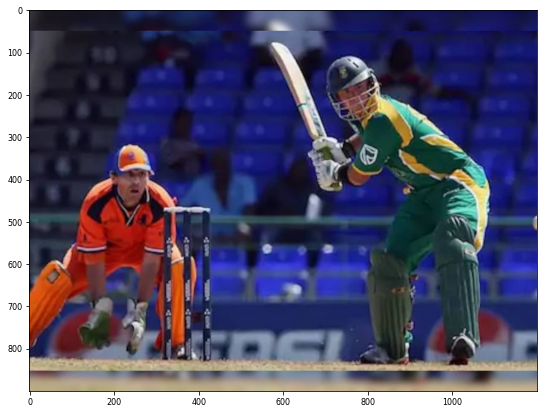

In [13]:
# CHECK ONE OF THE IMAGES -- > LETS PICK THE FIRST IN THE LIST
plt.imshow(imread(os.path.join(TRAIN_IMAGES, 'cfd2c28c74.jpg')));

In [14]:
# CHECK THE CLASS NAME OF THE DISPLAYED SPORT
train_df['label'][4]

'Cricket'

In [15]:
# IMAGE COUNT PER SPORT
train_df['label'].value_counts()

Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: label, dtype: int64

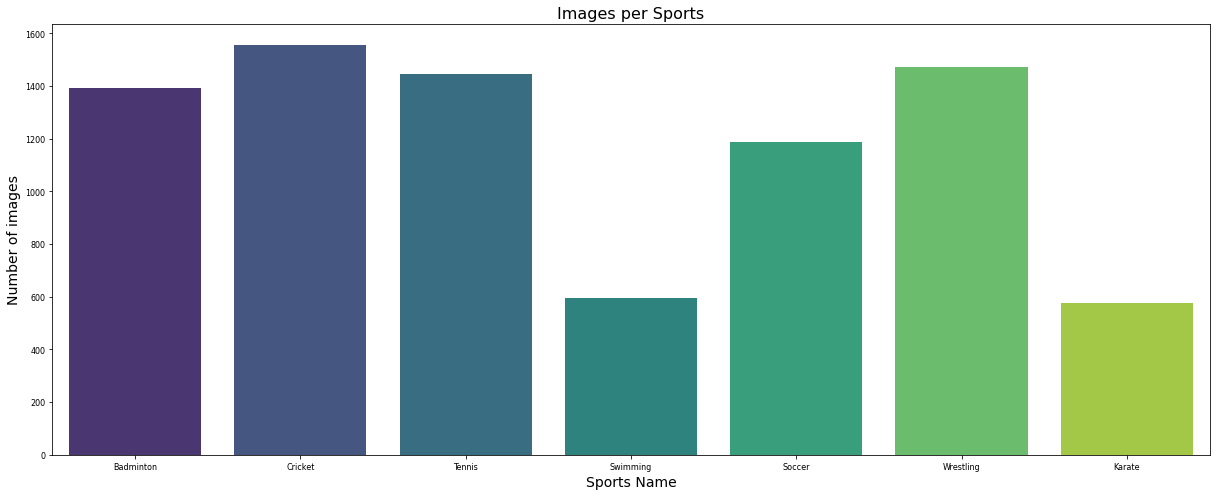

In [16]:
# VISUALIZE IMAGE COUNT PER SPORT
sns.countplot(train_df['label'],palette='viridis')
plt.title('Images per Sports',)
plt.ylabel('Number of images')
plt.xlabel('Sports Name')
plt.tight_layout()

In [17]:
# PICK A RANDOM SPORTS
x = random.randint(0,len(train_df['label'].unique()))
random_sport = sports_labels[x]

sports_show = train_df[train_df['label']==random_sport]
print(f'The selected sport to display various images is {random_sport.upper()}')
sports_show.head()

The selected sport to display various images is KARATE


,image_ID,label
36,c7657216ce.jpg,Karate
60,8116da71f7.jpg,Karate
73,4c03de88f8.jpg,Karate
85,77f83a248a.jpg,Karate
88,b8c2e10e96.jpg,Karate


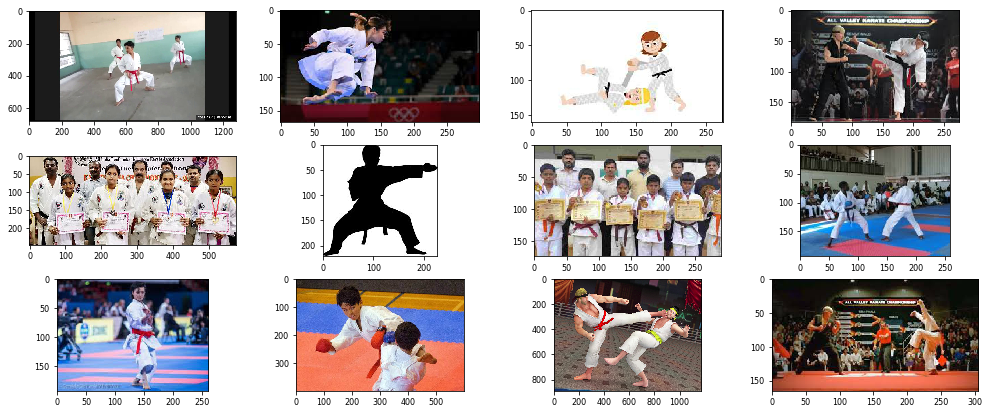

In [18]:
# DISPLAY THE SPORTS IMAGES --- > NOTICE THE VARIATION IN THE IMAGES OF THE SAME SPORT
n_rows = 3
n_cols = 4

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        # PICK RANDOM IMAGES OF THE SELECTED SPORT
        sport_img = random.randint(0,len(sports_show))
        image_ = plt.imread(os.path.join(TRAIN_IMAGES,sports_show.iloc[sport_img]['image_ID']))
        # DISPLAY THE IMAGE
        plt.imshow(image_,cmap='binary',interpolation='nearest')
        #plt.axis('off')
        rcParams['axes.titlesize']= 12
        #plt.title(random_sport)  

In [19]:
IMAGE_SHAPE = (224,224,3)

In [20]:
# IMPORT THE REQUIRED KERAS LIBRARIES FOR IMAGE AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input

In [22]:
image_generator = ImageDataGenerator(    
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.2,
    dtype= 'float32'
)





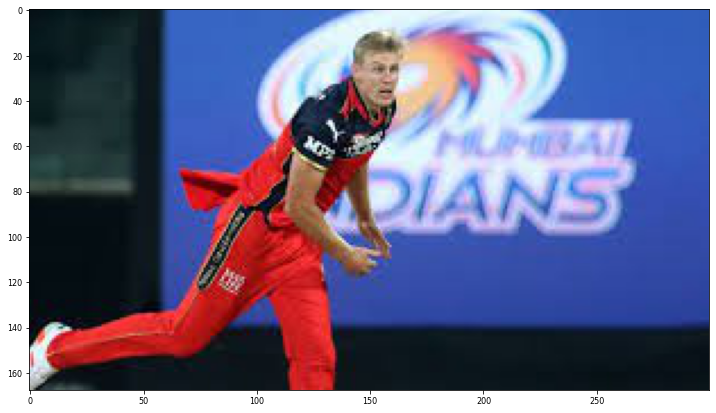

In [23]:
# DISPLAY THE ORIGINAL AND THE GENERATED IMAGES
image = imread(os.path.join(TRAIN_IMAGES,'00473a616a.jpg'))
plt.imshow(image)

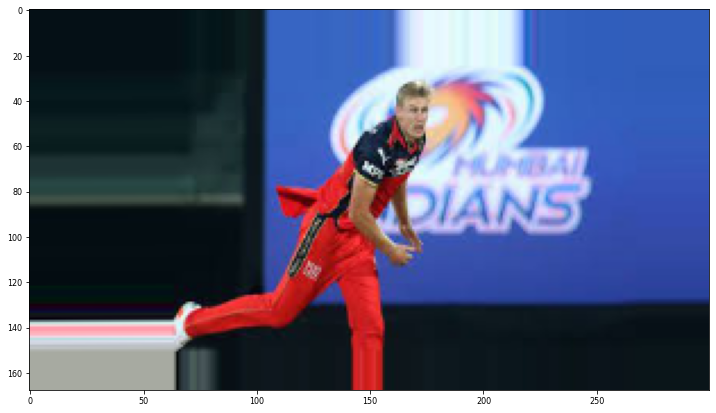

In [24]:
gen_image = image_generator.random_transform(image)
plt.imshow(gen_image)

In [25]:
# DEFINE THE BATCH SIZE - --- > THIS IS USED AS AN INPUT WHILE FITTING THE MODEL USING GENERATORS
BATCH_SIZE = 32

In [26]:

# CREATE THE TRAINING GENERATOR 
train_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_IMAGES,
                                                      x_col='image_ID',
                                                      y_col='label',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator

Found 6582 validated image filenames belonging to 7 classes.


In [27]:
# CREATE THE VALIDATION GENERATOR 
validation_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                           directory=TRAIN_IMAGES,
                                                           x_col='image_ID',
                                                           y_col='label',
                                                           subset='validation',
                                                           color_mode='rgb',
                                                           batch_size=BATCH_SIZE,
                                                           seed=42,
                                                           shuffle=False,
                                                           class_mode='categorical',
                                                           target_size=(224,224))

validation_generator

Found 1645 validated image filenames belonging to 7 classes.


In [28]:
# TEST GENERATOR ... NO SHUFFLE & CLASS MODE SET TO NONE
test_generator = image_generator.flow_from_dataframe(dataframe=test_df,
                                                     directory=TEST_IMAGES,
                                                     x_col='image_ID',
                                                     y_col=None,
                                                     batch_size=BATCH_SIZE,
                                                     color_mode='rgb',
                                                     seed=42,
                                                     shuffle=False,
                                                     class_mode=None,
                                                     target_size=(224,224))

test_generator

Found 2056 validated image filenames.


In [29]:
## IMPORT THE LIBRARIES

from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,AvgPool2D,GlobalMaxPool2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [30]:
trial = 4

In [31]:
if trial==1: # Basic Model
    ## DEFINE THE BASIC MODEL
    model =  Sequential()

    # ADD CONVOLUTIONAL LAYERS and MaxPooling Layer -- > Typical CNN Model
    model.add(Conv2D(filters=32,kernel_size=(7,7),input_shape=IMAGE_SHAPE,strides=1,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    # ADD DENSE LAYERS
    model.add(Flatten())
    model.add(Dense(units=512,activation='relu'))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=7,activation='softmax'))
    
    
    # COMPILE THE BASIC MODEL 
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  
    # PRINT MODEL SUMMARY
    print('BASIC MODEL')
    model.summary()
    
elif trial==2: # Batch Normalization plus selu actiovation and lecun-normal kernel initializer
    model = Sequential()
    
    # Add the CNN layers 
    model.add(Conv2D(filters=32,input_shape=IMAGE_SHAPE,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    # ADD THE DNN LAYERS
    model.add(Flatten())
    model.add(BatchNormalization())
    
    model.add(Dense(units=256,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=128,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=64,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(units=32,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=7,activation='softmax'))
    
    # COMPILE THE MODEL
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Model with Batch Normalization')
    model.summary()
    
elif trial==3:    # VGG16 Pre Trained Model - SGD as well as Adam -- > Adam performs faster and returns better accuracy
    base_model = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(7,activation='softmax')(class3)
    # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    print('Transfer Learning based on VGG16')
    model.summary()
    
else:
    base_model = Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    #avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(7,activation='softmax')(class3)
     # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    
    print('Transfer Learning based on Xception Module')
    model.summary() 

2022-03-13 14:15:37.047344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 14:15:37.146738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 14:15:37.147489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 14:15:37.148634: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 1s 0us/step
Transfer Learning based on Xception Module
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
# DEFINE CALLBACKS ---- > EARLY STOP AND REDUCE LEARNING RATE ON PLATEAU
early_stop = EarlyStopping(patience=9,monitor='val_loss',restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.1)
csv_logger = CSVLogger('epoch_run_transfer_Xception.csv',separator=',',append=True)

In [33]:
# DEFINE THE STEPS_PER_EPOCH
STEP_SIZE_TRAIN = (train_generator.n // train_generator.batch_size)   
STEP_SIZE_VALIDATION = (validation_generator.n // validation_generator.batch_size)   
STEP_SIZE_TEST = (test_generator.n // test_generator.batch_size) 

In [34]:
 # TRAIN THE MODEL

model.fit(train_generator, validation_data=validation_generator, 
steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALIDATION, 
callbacks=[early_stop,csv_logger],
epochs=30)

2022-03-13 14:15:43.166426: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-03-13 14:15:47.561328: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


205/205 [==============================] - 194s 902ms/step - loss: 1.8596 - accuracy: 0.3021 - val_loss: 1.5958 - val_accuracy: 0.4099
Epoch 2/30
205/205 [==============================] - 144s 703ms/step - loss: 1.6601 - accuracy: 0.3716 - val_loss: 1.5618 - val_accuracy: 0.4154
Epoch 3/30
205/205 [==============================] - 144s 704ms/step - loss: 1.6187 - accuracy: 0.3860 - val_loss: 1.5057 - val_accuracy: 0.4271
Epoch 4/30
205/205 [==============================] - 146s 710ms/step - loss: 1.5443 - accuracy: 0.4192 - val_loss: 1.5219 - val_accuracy: 0.4295
Epoch 5/30
205/205 [==============================] - 146s 711ms/step - loss: 1.5088 - accuracy: 0.4296 - val_loss: 1.4394 - val_accuracy: 0.4577
Epoch 6/30
205/205 [==============================] - 145s 709ms/step - loss: 1.4999 - accuracy: 0.4403 - val_loss: 1.4643 - val_accuracy: 0.4669
Epoch 7/30
205/205 [==============================] - 146s 712ms/step - loss: 1.4720 - accuracy: 0.4515 - val_loss: 1.3794 - val_accura

In [35]:
base_model.trainable = True
opt = Adam(lr=0.00001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')


model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=40,
                   callbacks=[early_stop,csv_logger])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
205/205 [==============================] - 180s 860ms/step - loss: 5.4526 - accuracy: 0.2515 - val_loss: 2.4854 - val_accuracy: 0.1826
Epoch 2/40
205/205 [==============================] - 189s 921ms/step - loss: 1.8026 - accuracy: 0.3508 - val_loss: 1.8880 - val_accuracy: 0.2696
Epoch 3/40
205/205 [==============================] - 176s 858ms/step - loss: 1.5034 - accuracy: 0.4447 - val_loss: 1.4495 - val_accuracy: 0.4614
Epoch 4/40
205/205 [==============================] - 177s 861ms/step - loss: 1.3025 - accuracy: 0.5305 - val_loss: 1.1626 - val_accuracy: 0.5790
Epoch 5/40
205/205 [==============================] - 175s 854ms/step - loss: 1.1264 - accuracy: 0.5991 - val_loss: 1.0173 - val_accuracy: 0.6391
Epoch 6/40
205/205 [==============================] - 177s 863ms/step - loss: 0.9899 - accuracy: 0.6493 - val_loss: 0.8682 - val_accuracy: 0.7004
Epoch 7/40
205/205 [==============================] - 178s 867ms/step - loss: 0.8572 - accuracy: 0.7026 - val_loss: 0.7778 -

In [36]:
# EVALUATE THE MODEL ... 
model.evaluate_generator(generator=validation_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.18193674087524414, 0.9477203488349915]

In [37]:
data_generator = ImageDataGenerator(    
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.0,
    dtype= 'float32'
) 

In [38]:
train_generator_full = data_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_IMAGES,
                                                      x_col='image_ID',
                                                      y_col='label',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator_full

Found 8227 validated image filenames belonging to 7 classes.


In [39]:
model.fit(train_generator_full,
                   steps_per_epoch=train_generator_full.n//train_generator_full.batch_size,
                   epochs=30,
                   callbacks=[early_stop]
                   )

Epoch 1/30
257/257 [==============================] - 183s 711ms/step - loss: 0.1024 - accuracy: 0.9655
Epoch 2/30
257/257 [==============================] - 186s 723ms/step - loss: 0.0911 - accuracy: 0.9703
Epoch 3/30
257/257 [==============================] - 185s 720ms/step - loss: 0.0829 - accuracy: 0.9724
Epoch 4/30
257/257 [==============================] - 183s 712ms/step - loss: 0.0714 - accuracy: 0.9768
Epoch 5/30
257/257 [==============================] - 184s 716ms/step - loss: 0.0741 - accuracy: 0.9749
Epoch 6/30
257/257 [==============================] - 186s 724ms/step - loss: 0.0769 - accuracy: 0.9754
Epoch 7/30
257/257 [==============================] - 189s 733ms/step - loss: 0.0627 - accuracy: 0.9797
Epoch 8/30
257/257 [==============================] - 184s 714ms/step - loss: 0.0584 - accuracy: 0.9802
Epoch 9/30
257/257 [==============================] - 187s 728ms/step - loss: 0.0599 - accuracy: 0.9815
Epoch 10/30
257/257 [==============================] - 188s 732m

In [40]:
# RESET THE GENERATOR TO GET THE RESULTS IN THE RIGHT ORDER
test_generator.reset()


In [41]:
# GENERATE PREDICTIONS ON THE TEST DATA
predictions = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [42]:
# RETRIEVE THE CLASS INDEX FOR WHICH THE PROBABILITY IS MAXIMUM ...hence np.argmax
predictions_class_index = np.argmax(predictions,axis=1)

In [43]:
# CHECK THE PREDICTED CLASS INDICES
predictions_class_index

array([3, 0, 0, ..., 6, 4, 1])

In [44]:
# EXTRACT THE PREDICTION LABELS
label = (train_generator.class_indices)
label = dict((v,k) for k,v in label.items())
final_predictions = [label[k] for k in predictions_class_index]

In [45]:
# LIST THE FINAL PREDICTED LABELS
final_predictions

['Soccer',
 'Badminton',
 'Badminton',
 'Wrestling',
 'Tennis',
 'Tennis',
 'Cricket',
 'Tennis',
 'Swimming',
 'Soccer',
 'Swimming',
 'Soccer',
 'Swimming',
 'Cricket',
 'Wrestling',
 'Swimming',
 'Soccer',
 'Wrestling',
 'Cricket',
 'Cricket',
 'Cricket',
 'Wrestling',
 'Wrestling',
 'Karate',
 'Wrestling',
 'Karate',
 'Cricket',
 'Badminton',
 'Cricket',
 'Wrestling',
 'Soccer',
 'Badminton',
 'Cricket',
 'Swimming',
 'Soccer',
 'Tennis',
 'Wrestling',
 'Cricket',
 'Badminton',
 'Swimming',
 'Badminton',
 'Tennis',
 'Tennis',
 'Badminton',
 'Cricket',
 'Tennis',
 'Cricket',
 'Badminton',
 'Badminton',
 'Badminton',
 'Cricket',
 'Tennis',
 'Tennis',
 'Soccer',
 'Cricket',
 'Soccer',
 'Swimming',
 'Soccer',
 'Cricket',
 'Tennis',
 'Wrestling',
 'Karate',
 'Tennis',
 'Badminton',
 'Tennis',
 'Wrestling',
 'Cricket',
 'Karate',
 'Soccer',
 'Badminton',
 'Soccer',
 'Karate',
 'Wrestling',
 'Cricket',
 'Wrestling',
 'Soccer',
 'Wrestling',
 'Tennis',
 'Tennis',
 'Wrestling',
 'Karate',
 

In [46]:
len(final_predictions)

2056

In [47]:
# PREPARE FOR SUBMISSION
filenames=test_generator.filenames
results=pd.DataFrame({"image_ID":filenames,
                      "label":final_predictions})
results.to_csv("submission.csv",index=False)

In [48]:
model.save('sports_final_model_v2.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
